In [1]:
from keras.datasets import cifar10
from keras.utils.np_utils import to_categorical
import matplotlib.pyplot as plt
import random
from PIL import Image
import tensorflow as tf

In [2]:
num_classes = 10
classes = {0:"airplane", 1:"automobile", 2:"bird",3:"cat", 4:"deer",\
           5:"dog", 6:"frog", 7:"horse", 8:"ship", 9:"truck"}

# The data, shuffled and split between train and test sets:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

x_train = x_train.astype('float32')/255
y_train_onehot = to_categorical(y_train, num_classes) 

x_test = x_test.astype('float32')/255
y_test_onehot = to_categorical(y_test, num_classes) 

print('x_train shape:', x_train.shape)
print('y_train shape', y_train.shape)
print('y_train_onehot shape:', y_train_onehot.shape)
print('x_test shape:', x_test.shape)
print('y_train shape', y_test.shape)
print('y_test_onehot shape:', y_test_onehot.shape)

170508288/170498071 [==============================] - 4s 0us/step
x_train shape: (50000, 32, 32, 3)
y_train shape (50000, 1)
y_train_onehot shape: (50000, 10)
x_test shape: (10000, 32, 32, 3)
y_train shape (10000, 1)
y_test_onehot shape: (10000, 10)


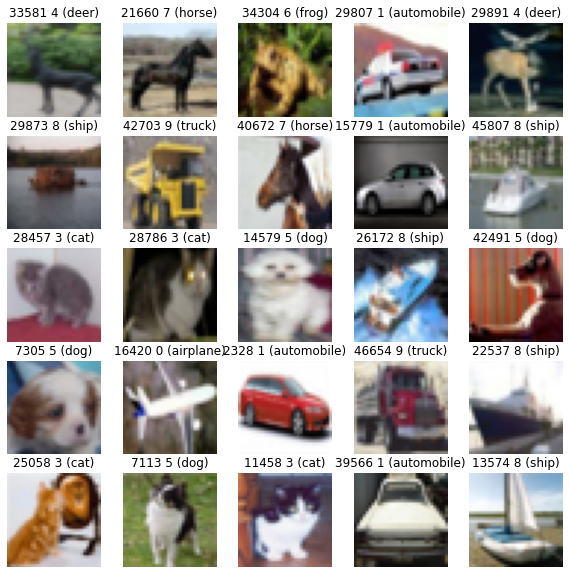

In [3]:
pltsize=2
row_images = 5
col_images = 5
plt.figure(figsize=(col_images*pltsize, row_images*pltsize))

for i in range(row_images * col_images):
    i_rand = random.randint(0, x_train.shape[0])
    plt.subplot(row_images,col_images,i+1)
    plt.axis('off')
    plt.imshow(x_train[i_rand])
    plt.title(str(i_rand) + " " + str(y_train[i_rand][0])\
              + " (" + classes[y_train[i_rand][0]] + ")")

In [4]:
import matplotlib.pyplot as plt

def plot_loss(history, title):
  plt.plot(history['loss'], label="training loss")
  plt.plot(history['val_loss'], label="validation loss")
  plt.legend(loc='upper center')
  plt.xlabel('epochs')
  plt.ylabel('loss')
  plt.title(title)
  plt.show()

## FeedForward Neural Network

In [6]:
from keras.layers import Activation, Dense, Flatten, Dropout
from keras.models import Sequential

loss_fn = tf.keras.losses.CategoricalCrossentropy()
# best_config = None
h = None
minimum_loss = float('inf')
best_ffnn_model = None

for _ in range(5): # experimenting 5 FFNN models with randomly generated depth and width
  num_hlayers = random.randint(2, 10) # depth is chosen randomly between 2-10
  model = Sequential()
  model.add(Flatten(input_shape=(32,32,3)))
  hl_sizes = list()
  for hl in range(num_hlayers):
    layer_size = random.randint(32, 256) # width is chosen randomly between 32-256 for every layer
    model.add(Dense(units=layer_size, activation='relu'))
    hl_sizes.append(layer_size)
  model.add(Dense(units=10, activation='softmax'))
  model.compile(optimizer='adam',loss=loss_fn)
  history = model.fit(x_train, y_train_onehot, epochs=50, verbose=0, validation_split=0.2)
  model_loss = model.evaluate(x_test, y_test_onehot, verbose=0)
  if model_loss < minimum_loss:
    minimum_loss = model_loss
    h = history
    best_ffnn_model = model

print("Details for the FastForward NN with minimum loss:")
best_ffnn_model.summary()

Details for the FastForward NN with minimum loss:
Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 3072)              0         
                                                                 
 dense_7 (Dense)             (None, 56)                172088    
                                                                 
 dense_8 (Dense)             (None, 52)                2964      
                                                                 
 dense_9 (Dense)             (None, 176)               9328      
                                                                 
 dense_10 (Dense)            (None, 10)                1770      
                                                                 
Total params: 186,150
Trainable params: 186,150
Non-trainable params: 0
________________________________________________________________

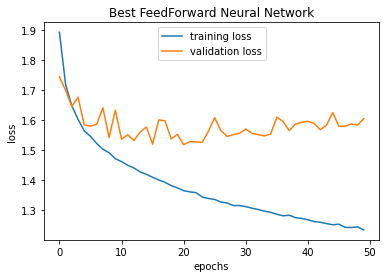

In [7]:
plot_loss(h.history, "Best FeedForward Neural Network")

## CNN 

In [8]:
loss_fn = tf.keras.losses.CategoricalCrossentropy()


from keras.layers import Conv2D, MaxPooling2D
possible_filters = [8, 16, 32, 64]
cnn_loss = float('inf')
cnn_h = None
best_cnn_model = None

for _ in range(3):
  model = Sequential()
  model.add(Conv2D(16, (3, 3), input_shape=(32, 32, 3), padding='same', activation='relu'))
  num_conv_base = random.randint(1,4)
  for _ in range(num_conv_base):
    filter = possible_filters[random.randint(0,3)] # randomly choose from possible filters 
    kernel_size = random.randint(1,4) # randomly choose kernel size from 1 to 4 
    model.add(Conv2D(filter, (kernel_size, kernel_size), padding='same', activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(random.randint(1,5)/10)) # Random dropout rate from 0.1~0.5 
  model.add(Flatten())
  model.add(Dense(units=32, activation='relu'))
  model.add(Dense(units=10, activation='softmax'))
  model.compile(optimizer='adam',loss=loss_fn)
  history = model.fit(x_train, y_train_onehot, epochs=50, verbose=0, validation_split=0.2)
  model_loss = model.evaluate(x_test, y_test_onehot, verbose=0)
  if model_loss < cnn_loss:
    cnn_loss = model_loss
    best_cnn_model = model
    cnn_h = history

best_cnn_model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 16)        448       
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 16)        1040      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 16)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 16, 16, 16)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 16, 16, 64)        9280      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 8, 8, 64)         0         
 2D)                                                  

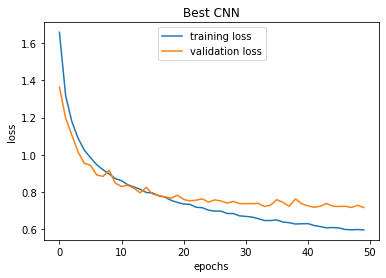

In [9]:
plot_loss(cnn_h.history, "Best CNN")

FastForward Neural Network generally has a higher training loss, and the validation loss remains unstably high throughout 50 epochs, suggesting that even the best model among the 5 randomly generated FFNNs could be relatively poor in generalizing. On the other hand, CNN model shows less training error and validation loss. This demonstrates how the use of 2D-filters to capture features of objects work well with image recognition.   